In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix, classification_report, roc_auc_score,
roc_curve, average_precision_score
)
import time



In [91]:
df=pd.read_csv("/content/spambase_csv.csv")

In [92]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [93]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [94]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [95]:
df.shape

(4601, 58)

In [96]:
df.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [97]:
df.duplicated().sum()


np.int64(391)

In [98]:
df = df.drop_duplicates().reset_index(drop=True)


In [99]:
nums_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
print(nums_cols)
cat_cols=df.select_dtypes(include='object').columns.tolist()
print(cat_cols)
binary_cols=[col for col in df.columns if df[col].nunique()==2]
print(binary_cols)
num_cols=[col for col in nums_cols if col not in binary_cols]
print(num_cols)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_freq_%24', 'char_freq_%

In [100]:
x=df.drop(columns=['class'],inplace=False)
y=df['class']

In [101]:
x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [102]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1


In [103]:
X_scaled=StandardScaler().fit_transform(x)

In [104]:
X=pd.DataFrame(X_scaled,columns=num_cols,index=df.index)

In [105]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.116407,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,...,-0.116407,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,...,-0.116407,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.116407,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954


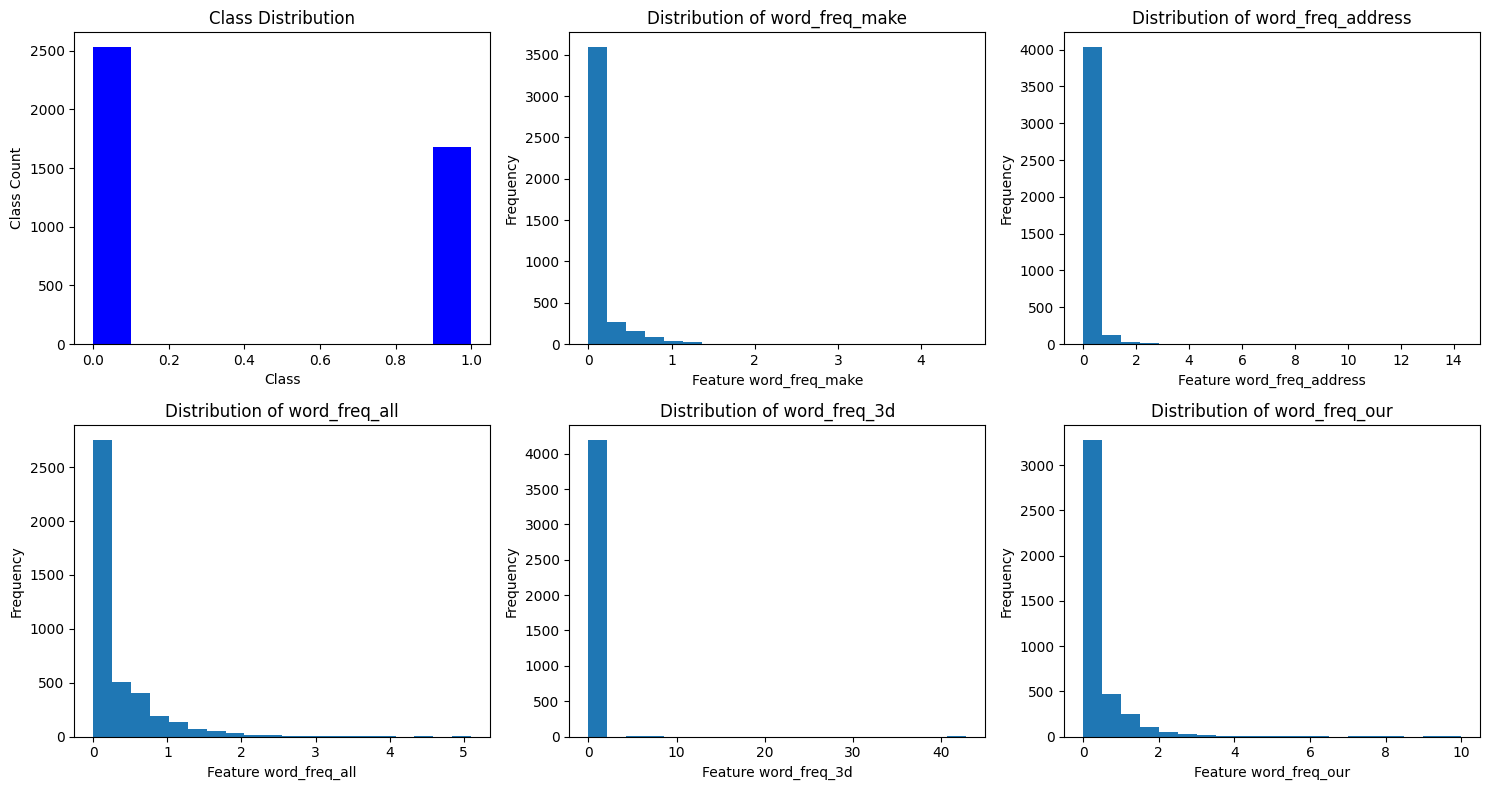

In [106]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# 1️⃣ Class distribution
axes[0].hist(df['class'], color="blue")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Class Count")
axes[0].set_title("Class Distribution")

# 2️⃣ First 5 feature distributions
for i, col in enumerate(x.columns[:5], start=1):
    axes[i].hist(x[col], bins=20)
    axes[i].set_xlabel(f"Feature {col}")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
lr = LogisticRegression(max_iter=500)

lr.fit(X_train, y_train)

cv_scores = cross_val_score(
    lr,
    X_train,
    y_train,
    cv=5,
    scoring="accuracy"
)

print("CV Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


CV Scores: [0.90801187 0.91097923 0.92581602 0.92421991 0.93907875]
Mean CV Accuracy: 0.9216211568732062


In [109]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"]
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=3000),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid_lr.fit(X_train, y_train)

print(grid_lr.best_params_)
print(grid_lr.best_score_)


{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.9228085414085477


In [111]:
from sklearn.linear_model import LogisticRegression

best_lr = LogisticRegression(
    C=10,
    penalty="l2",
    solver="liblinear",
    max_iter=1000
)

best_lr.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Accuracy: 0.9144893111638955
Precision: 0.9283582089552239
Recall: 0.8662952646239555
F1: 0.8962536023054755


In [113]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[459  24]
 [ 48 311]]


In [114]:
from sklearn.svm import SVC

kernels = ["linear", "poly", "rbf", "sigmoid"]

for k in kernels:
    svm = SVC(kernel=k)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(k, accuracy_score(y_test, y_pred))


linear 0.9228028503562945
poly 0.7553444180522565
rbf 0.9144893111638955
sigmoid 0.8788598574821853


In [115]:
param_grid_svm = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]
}

grid_svm = GridSearchCV(
    SVC(),
    param_grid_svm,
    cv=5,
    scoring="accuracy"
)

grid_svm.fit(X_train, y_train)

print(grid_svm.best_params_)
print(grid_svm.best_score_)


{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.9299341713660875


In [116]:
start = time.time()

lr_model = LogisticRegression(
    C=10,
    penalty="l2",
    solver="liblinear",
    max_iter=1000
)
lr_model.fit(X_train, y_train)

lr_time = time.time() - start

y_pred_lr = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print(lr_accuracy, lr_precision, lr_recall, lr_f1, lr_time)


0.9216152019002375 0.9347181008902077 0.8774373259052924 0.9051724137931034 0.141951322555542


In [117]:
from sklearn.svm import SVC

start = time.time()

svm_model = SVC(kernel="rbf")
svm_model.fit(X_train, y_train)

svm_time = time.time() - start

y_pred_svm = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print(svm_accuracy, svm_precision, svm_recall, svm_f1, svm_time)


0.9144893111638955 0.9233038348082596 0.871866295264624 0.8968481375358166 0.4407005310058594


In [118]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import time

kernels = ["linear", "poly", "rbf", "sigmoid"]

results = []

for k in kernels:
    start = time.time()

    svm_model = SVC(kernel=k)
    svm_model.fit(X_train, y_train)

    train_time = time.time() - start

    y_pred = svm_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append((k, acc, f1, train_time))

    print(f"{k}  Accuracy: {acc:}  F1: {f1:}  Time: {train_time:}")


linear  Accuracy: 0.9228028503562945  F1: 0.9075391180654339  Time: 0.6759841442108154
poly  Accuracy: 0.7553444180522565  F1: 0.6127819548872181  Time: 0.5457615852355957
rbf  Accuracy: 0.9144893111638955  F1: 0.8968481375358166  Time: 0.29334259033203125
sigmoid  Accuracy: 0.8788598574821853  F1: 0.8555240793201133  Time: 0.31105947494506836


In [119]:
from sklearn.model_selection import cross_val_score,KFold
kfold = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

lr_cv = cross_val_score(
    lr_model,
    X,
    y,
    cv=kfold,
    scoring="accuracy"
)

print(lr_cv)
print("Average:", lr_cv.mean())


[0.9216152  0.91211401 0.92992874 0.92280285 0.93349169]
Average: 0.9239904988123515


In [120]:
svm_cv = cross_val_score(
    svm_model,
    X,
    y,
    cv=kfold,
    scoring="accuracy"
)

print(svm_cv)
print("Average:", svm_cv.mean())


[0.88004751 0.88123515 0.87885986 0.8824228  0.88954869]
Average: 0.8824228028503563


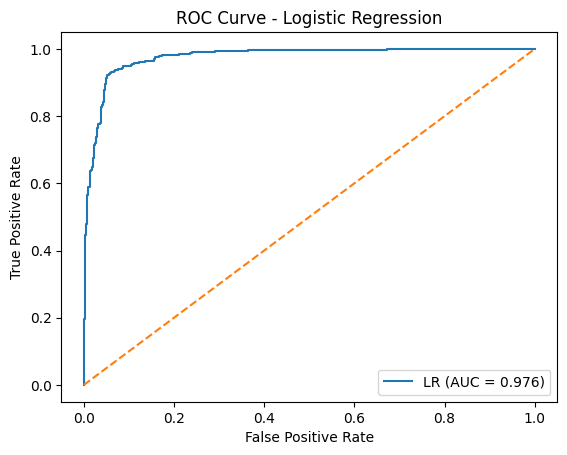

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC = {auc_lr:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


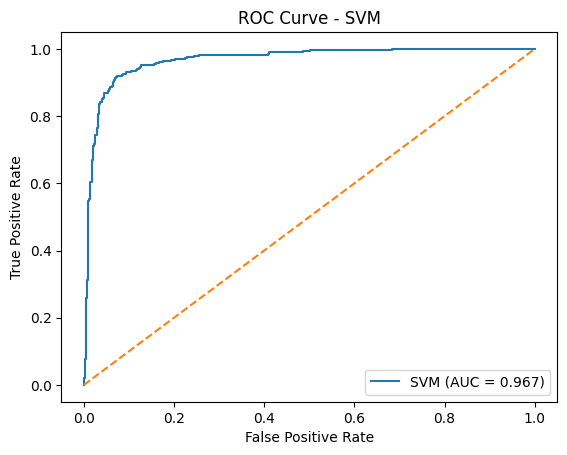

In [122]:
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train, y_train)

y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


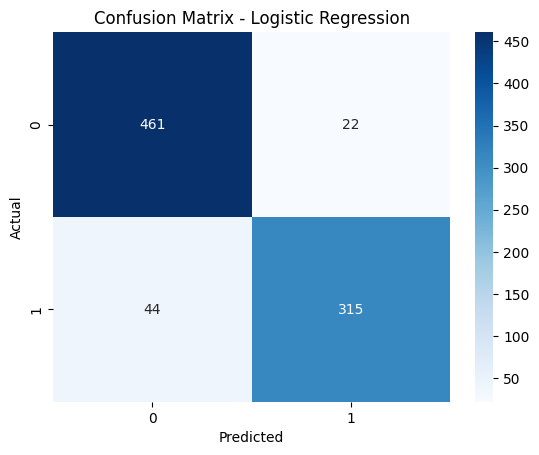

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


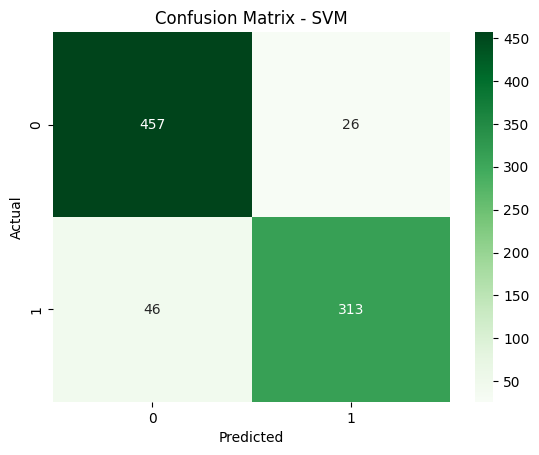

In [124]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

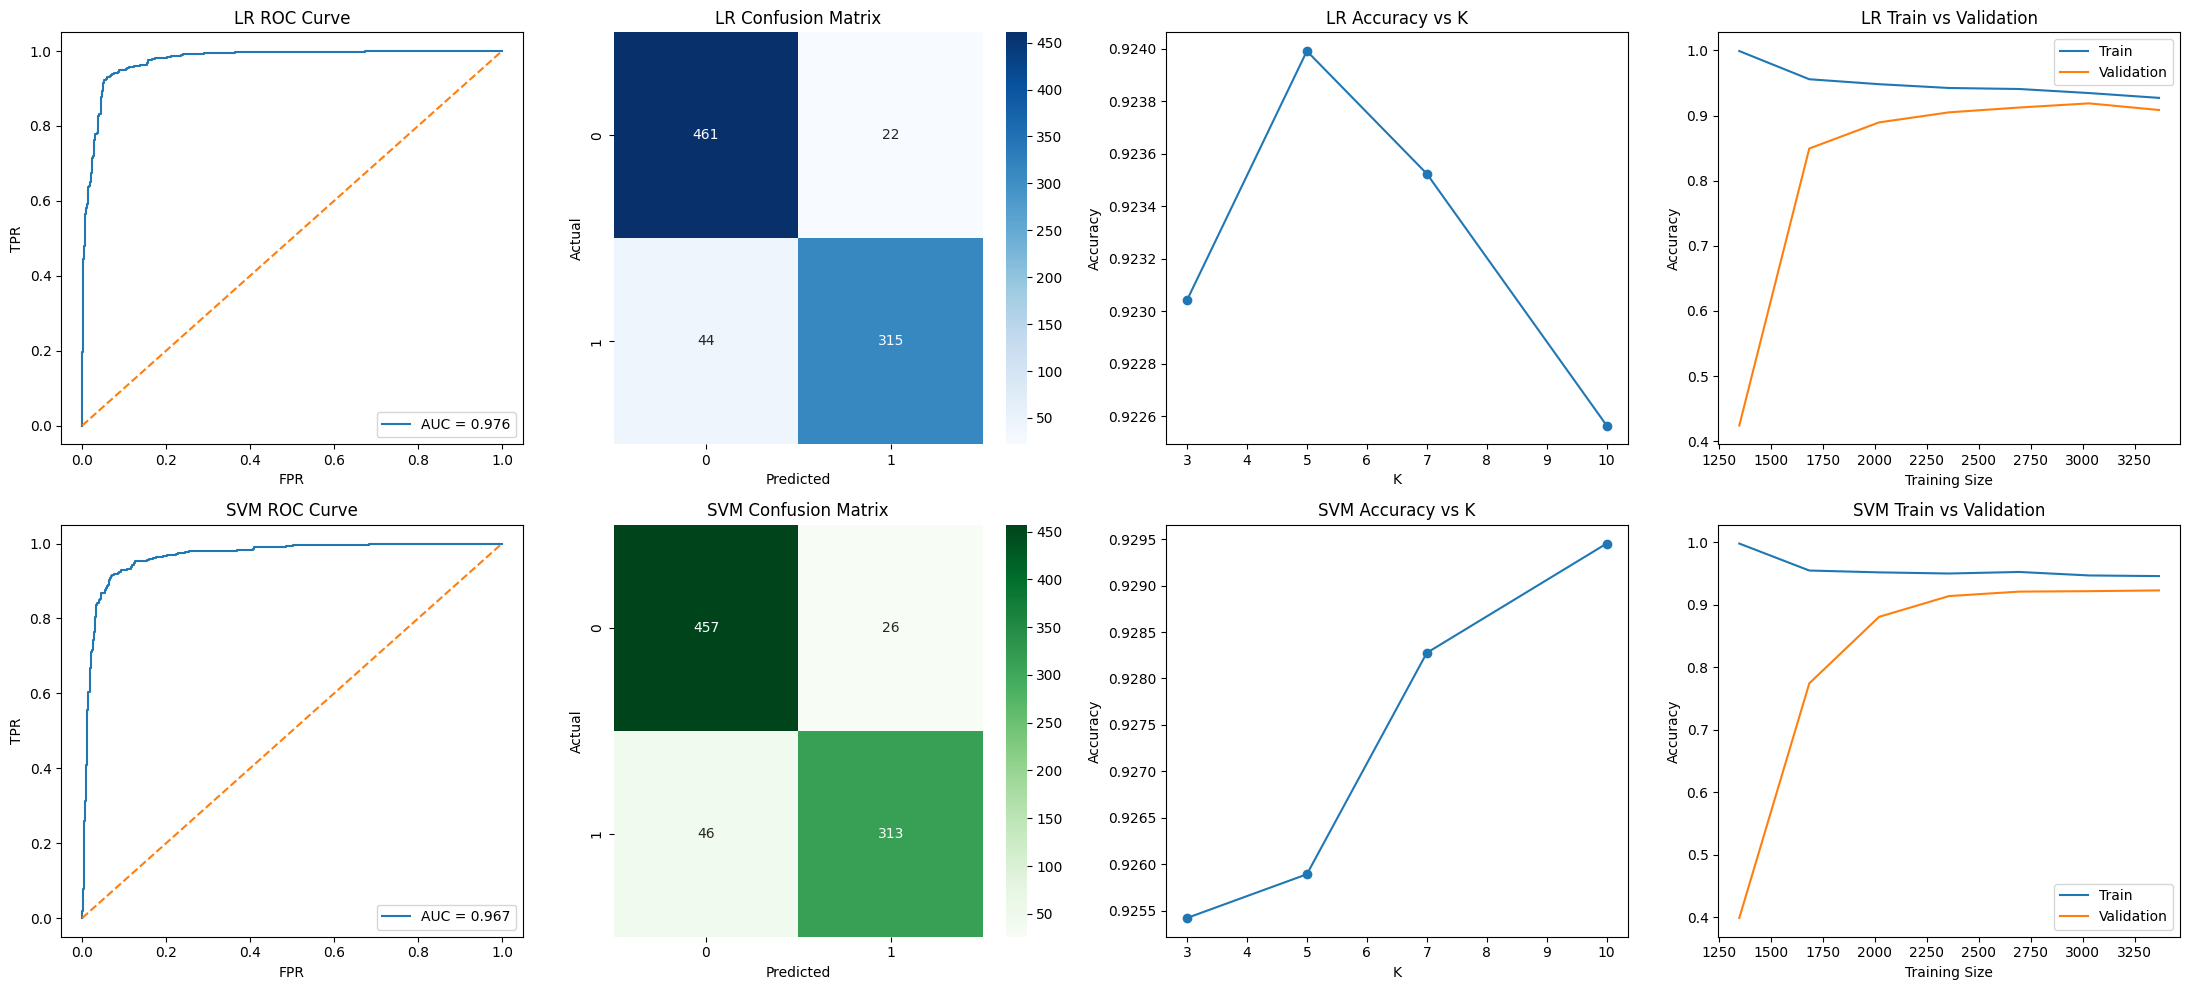

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

fig, axes = plt.subplots(2, 4, figsize=(22, 10))

# =========================
# LOGISTIC REGRESSION
# =========================

# ROC
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

axes[0, 0].plot(fpr_lr, tpr_lr, label=f"AUC = {auc_lr:.3f}")
axes[0, 0].plot([0, 1], [0, 1], linestyle="--")
axes[0, 0].set_title("LR ROC Curve")
axes[0, 0].set_xlabel("FPR")
axes[0, 0].set_ylabel("TPR")
axes[0, 0].legend()

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_title("LR Confusion Matrix")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

# Accuracy vs K
k_values = [3, 5, 7, 10]
lr_acc = []

for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(lr_model, X, y, cv=kf, scoring="accuracy")
    lr_acc.append(scores.mean())

axes[0, 2].plot(k_values, lr_acc, marker='o')
axes[0, 2].set_title("LR Accuracy vs K")
axes[0, 2].set_xlabel("K")
axes[0, 2].set_ylabel("Accuracy")

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    LogisticRegression(max_iter=500),
    X, y, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

axes[0, 3].plot(train_sizes, train_scores.mean(axis=1), label="Train")
axes[0, 3].plot(train_sizes, val_scores.mean(axis=1), label="Validation")
axes[0, 3].set_title("LR Train vs Validation")
axes[0, 3].set_xlabel("Training Size")
axes[0, 3].set_ylabel("Accuracy")
axes[0, 3].legend()

# =========================
# SVM
# =========================

# ROC
svm_prob_model = SVC(kernel="rbf", probability=True)
svm_prob_model.fit(X_train, y_train)

y_prob_svm = svm_prob_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

axes[1, 0].plot(fpr_svm, tpr_svm, label=f"AUC = {auc_svm:.3f}")
axes[1, 0].plot([0, 1], [0, 1], linestyle="--")
axes[1, 0].set_title("SVM ROC Curve")
axes[1, 0].set_xlabel("FPR")
axes[1, 0].set_ylabel("TPR")
axes[1, 0].legend()

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens", ax=axes[1, 1])
axes[1, 1].set_title("SVM Confusion Matrix")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

# Accuracy vs K
svm_acc = []
svm_model = SVC(kernel="rbf")

for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(svm_model, X, y, cv=kf, scoring="accuracy")
    svm_acc.append(scores.mean())

axes[1, 2].plot(k_values, svm_acc, marker='o')
axes[1, 2].set_title("SVM Accuracy vs K")
axes[1, 2].set_xlabel("K")
axes[1, 2].set_ylabel("Accuracy")

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    SVC(kernel="rbf"),
    X, y, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

axes[1, 3].plot(train_sizes, train_scores.mean(axis=1), label="Train")
axes[1, 3].plot(train_sizes, val_scores.mean(axis=1), label="Validation")
axes[1, 3].set_title("SVM Train vs Validation")
axes[1, 3].set_xlabel("Training Size")
axes[1, 3].set_ylabel("Accuracy")
axes[1, 3].legend()

plt.tight_layout()
plt.show()


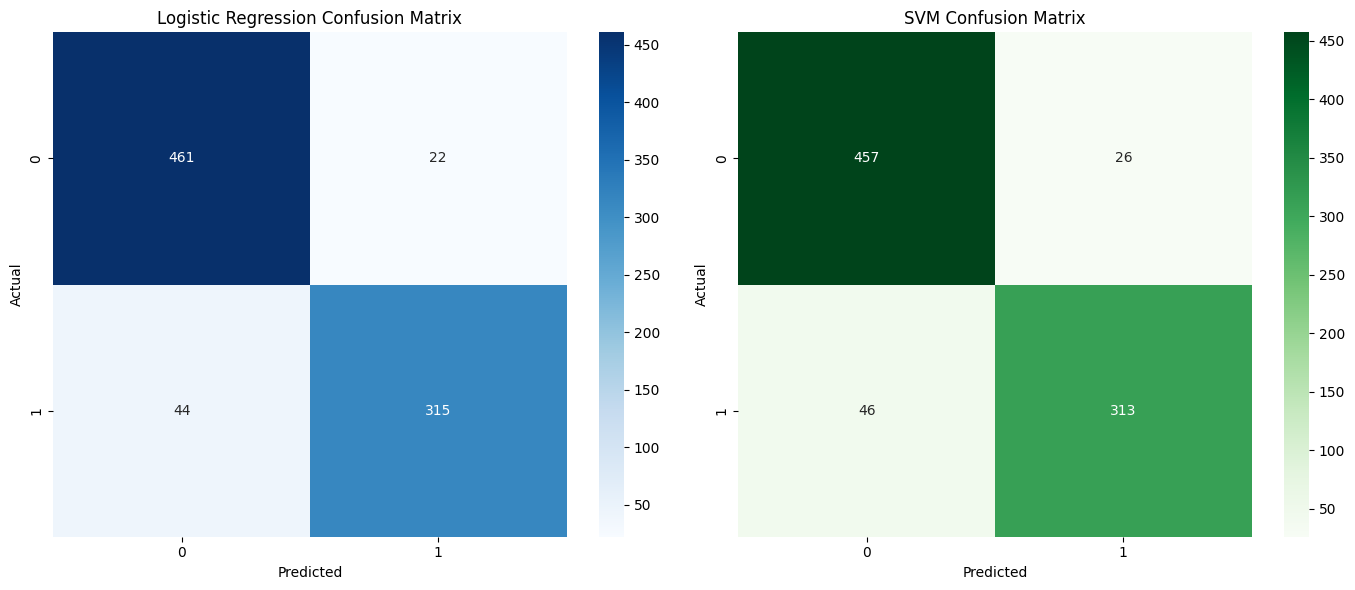

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


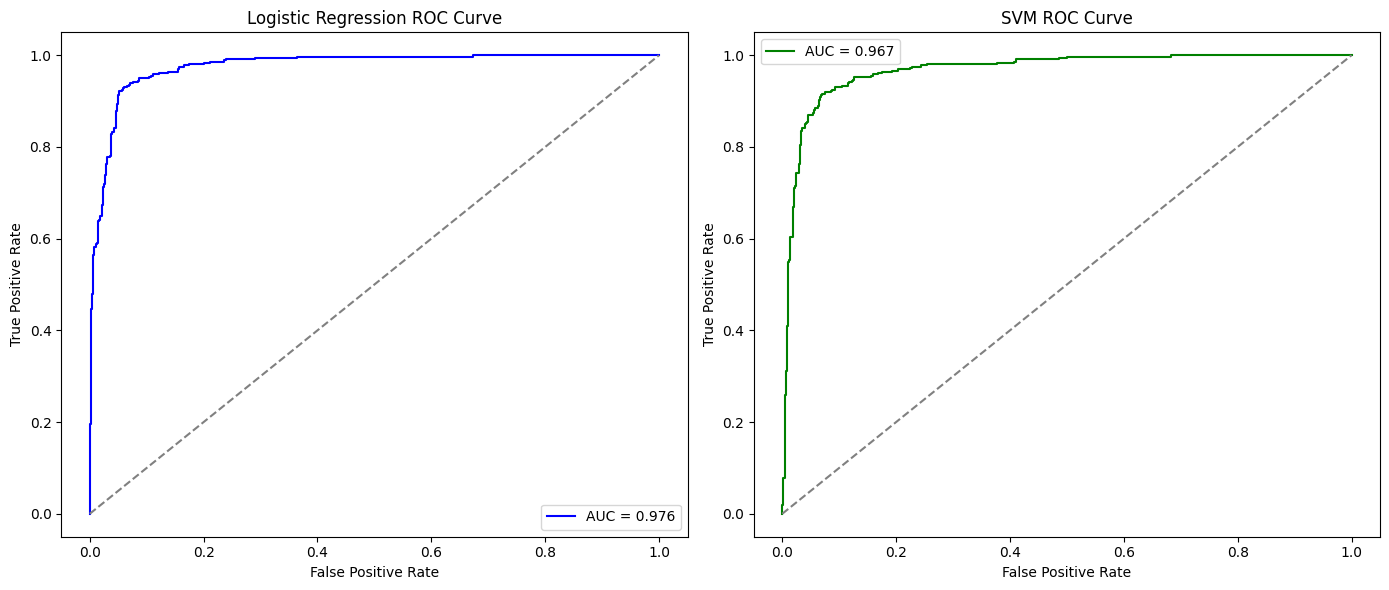

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression ROC
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

axes[0].plot(fpr_lr, tpr_lr, label=f"AUC = {auc_lr:.3f}", color="blue")
axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
axes[0].set_title("Logistic Regression ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()

# SVM ROC
svm_prob_model = SVC(kernel="rbf", probability=True)
svm_prob_model.fit(X_train, y_train)
y_prob_svm = svm_prob_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

axes[1].plot(fpr_svm, tpr_svm, label=f"AUC = {auc_svm:.3f}", color="green")
axes[1].plot([0, 1], [0, 1], linestyle="--", color="gray")
axes[1].set_title("SVM ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()

plt.tight_layout()
plt.show()


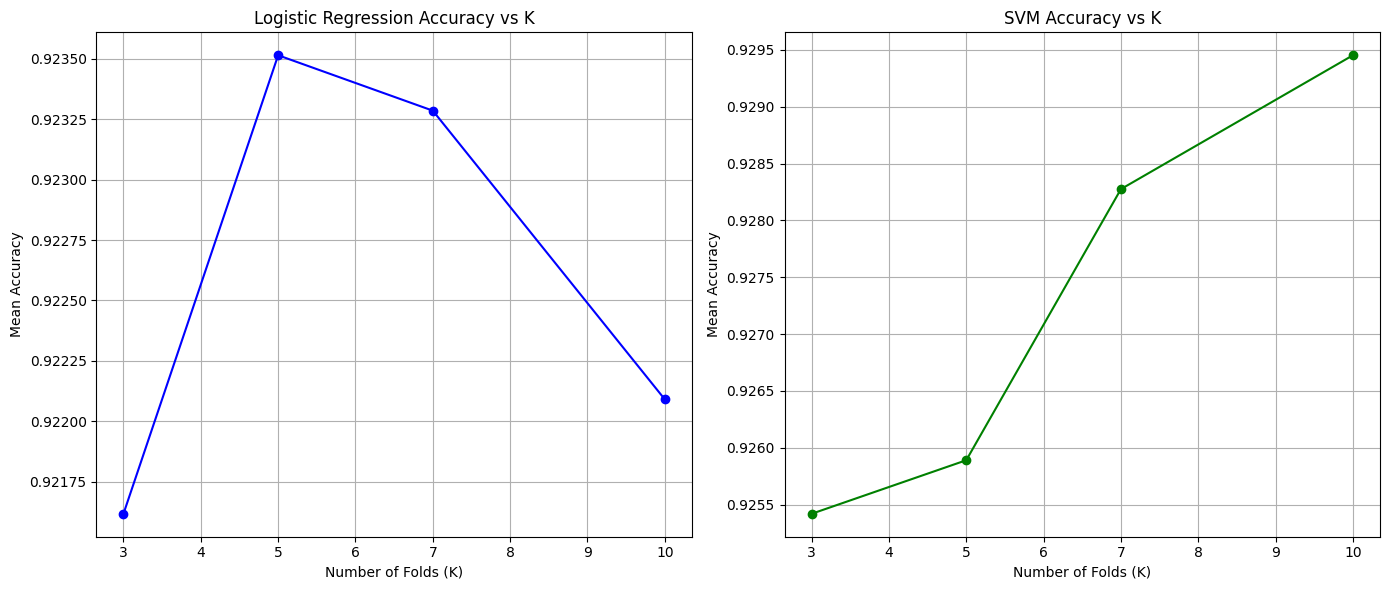

In [128]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

k_values = [3, 5, 7, 10]

# Logistic Regression Accuracy vs K
lr_model = LogisticRegression(max_iter=500)
lr_acc = []

for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(lr_model, X, y, cv=kf, scoring="accuracy")
    lr_acc.append(scores.mean())

# SVM Accuracy vs K
svm_model = SVC(kernel="rbf")
svm_acc = []

for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(svm_model, X, y, cv=kf, scoring="accuracy")
    svm_acc.append(scores.mean())

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(k_values, lr_acc, marker='o', color='blue')
axes[0].set_title("Logistic Regression Accuracy vs K")
axes[0].set_xlabel("Number of Folds (K)")
axes[0].set_ylabel("Mean Accuracy")
axes[0].grid(True)

axes[1].plot(k_values, svm_acc, marker='o', color='green')
axes[1].set_title("SVM Accuracy vs K")
axes[1].set_xlabel("Number of Folds (K)")
axes[1].set_ylabel("Mean Accuracy")
axes[1].grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

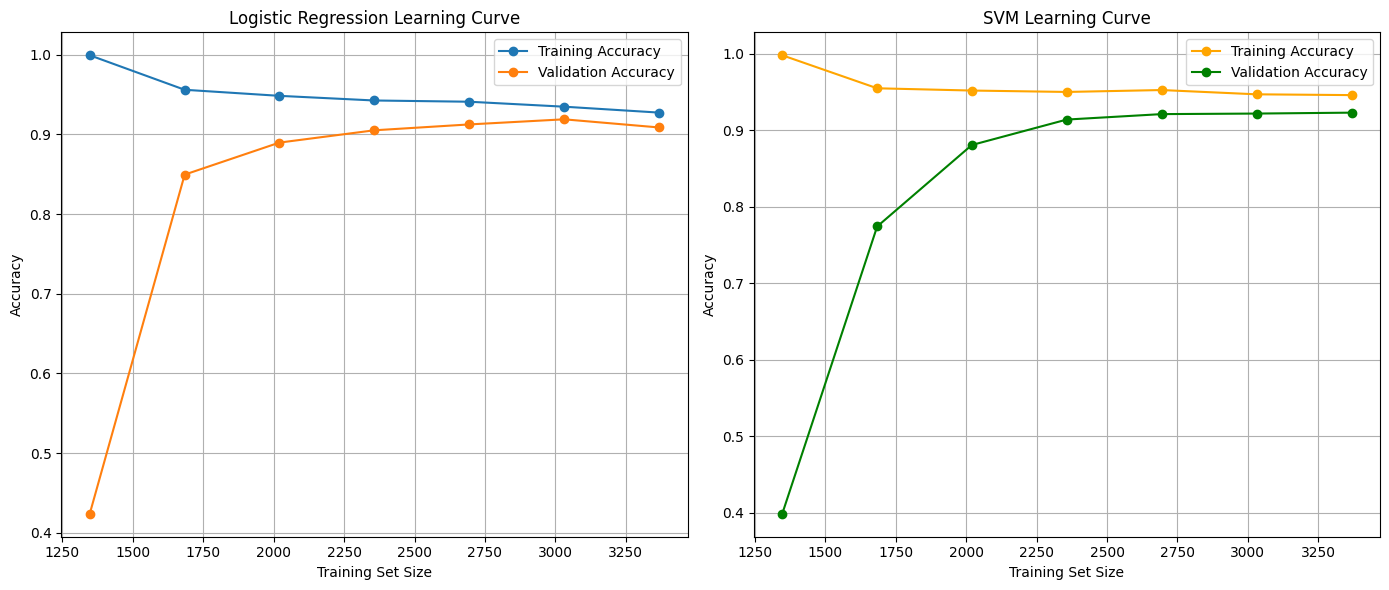

In [129]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

# ----------------------------
# Logistic Regression Learning Curve
# ----------------------------
lr_model = LogisticRegression(max_iter=500)
train_sizes_lr, train_scores_lr, val_scores_lr = learning_curve(
    lr_model, X, y, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean_lr = train_scores_lr.mean(axis=1)
val_mean_lr = val_scores_lr.mean(axis=1)

# ----------------------------
# SVM Learning Curve
# ----------------------------
svm_model = SVC(kernel="rbf")
train_sizes_svm, train_scores_svm, val_scores_svm = learning_curve(
    svm_model, X, y, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean_svm = train_scores_svm.mean(axis=1)
val_mean_svm = val_scores_svm.mean(axis=1)

# ----------------------------
# Plotting side-by-side
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression
axes[0].plot(train_sizes_lr, train_mean_lr, label="Training Accuracy", marker='o')
axes[0].plot(train_sizes_lr, val_mean_lr, label="Validation Accuracy", marker='o')
axes[0].set_title("Logistic Regression Learning Curve")
axes[0].set_xlabel("Training Set Size")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].grid(True)

# SVM
axes[1].plot(train_sizes_svm, train_mean_svm, label="Training Accuracy", marker='o', color='orange')
axes[1].plot(train_sizes_svm, val_mean_svm, label="Validation Accuracy", marker='o', color='green')
axes[1].set_title("SVM Learning Curve")
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
